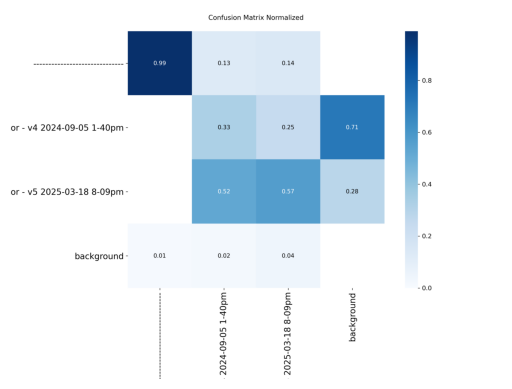

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("C:\\Users\\likhi\\PycharmProjects\\PythonProject\\runs\detect\\train\\confusion_matrix_normalized.png")
plt.imshow(img)
plt.axis('off')
plt.show()


In [31]:
from ultralytics import YOLO
import cv2
import os

model = YOLO("runs/detect/train/weights/best.pt")

image_path = "Images/Brain img/img 2.jpg"

output_folder = r"C:\Users\likhi\PycharmProjects\PythonProject\Images\Detected img"
os.makedirs(output_folder, exist_ok=True)

results = model.predict(source=image_path, save=False)
r = results[0]

annotated_image = r.plot()

detected = False
for box in r.boxes:
    if box.cls == 1:
        detected = True
        break

if detected:
    message = "Brain tumor detected"
    color = (0, 0, 255)
else:
    message = "No brain tumor detected"
    color = (0, 255, 0)

cv2.putText(
    annotated_image,
    message,
    org=(20, 40),
    fontFace=cv2.FONT_HERSHEY_SIMPLEX,
    fontScale=0.8,
    color=color,
    thickness=2,
    lineType=cv2.LINE_AA
)

cv2.imshow("Detection Result", annotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

filename = os.path.basename(image_path)
output_path = os.path.join(output_folder, filename)
cv2.imwrite(output_path, annotated_image)

print(f"✅ Saved detected image to: {output_path}")



image 1/1 C:\Users\likhi\PycharmProjects\PythonProject\Images\Brain img\img 2.jpg: 608x640 1 ------------------------------, 113.7ms
Speed: 3.8ms preprocess, 113.7ms inference, 3.3ms postprocess per image at shape (1, 3, 608, 640)
✅ Saved detected image to: C:\Users\likhi\PycharmProjects\PythonProject\Images\Detected img\img 2.jpg
